quand je fais tendre la variance de mes gaussiennes vers 0 (ie je "tends" vers un dirac) j'obtiens un barycentre qui s'écrase, il ne ressemble à aucune des 2 distributions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ot

In [64]:
x = np.linspace(0, 1.5, 100)
mu = np.exp(-((x - 0.3)**2) / 0.001)
nu = np.exp(-((x - 0.7)**2) / 0.001) + np.exp(-((x - 1)**2) / 0.03)

#on normalise pour avoir des probas
mu = mu / mu.sum()
nu = nu / nu.sum()

In [ ]:
A = np.vstack([mu, nu]).T  # (n_points, n_distributions)

M = ot.dist(x[:, None], x[:, None])**2 # cout quadratique / W_2

barycenter = ot.bregman.barycenter(A, M, reg=1e-2)

eucli = 0.5 * (mu+nu)

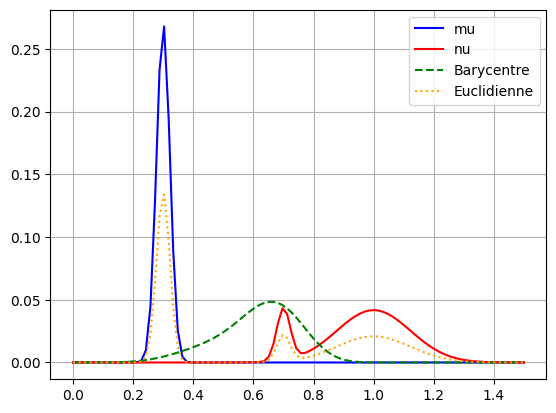

In [66]:
# Affichage
plt.plot(x, mu, label='mu', color='blue')
plt.plot(x, nu, label='nu', color='red')
plt.plot(x, barycenter, label='Barycentre', color='green', linestyle='--')
plt.plot(x, eucli, label='Euclidienne', color='orange', linestyle=':')

plt.legend()
plt.grid(True)
plt.show()

apparement ot.bregman.barycenter est un barycentre entropiquement régularisé (i.e. on ajoute un terme d’entropie) -> favorise les distributions lisses -> mettre reg très petit

pov ça change rien

/usr/local/lib/python3.12/site-packages/ot/backend.py:1168: RuntimeWarning: divide by zero encountered in log
  return np.log(a)
/usr/local/lib/python3.12/site-packages/ot/bregman/_barycenter.py:229: RuntimeWarning: invalid value encountered in divide
  u = (geometricMean(UKv) / UKv.T).T
/usr/local/lib/python3.12/site-packages/ot/bregman/_barycenter.py:250: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


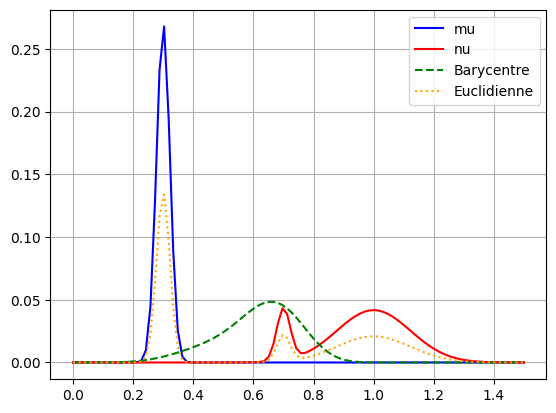

In [67]:
bary = ot.bregman.barycenter(A, M, reg=1e-4)

# Affichage
plt.plot(x, mu, label='mu', color='blue')
plt.plot(x, nu, label='nu', color='red')
plt.plot(x, barycenter, label='Barycentre', color='green', linestyle='--')
plt.plot(x, eucli, label='Euclidienne', color='orange', linestyle=':')

plt.legend()
plt.grid(True)
plt.show()